
# Swin‑UNet Quick‑Start Tutorial  🚀

This notebook shows you how to:

1. **Install & import** the `keras‑swin‑unet` package
2. **Train** on the built‑in `demo_data` (or your own images placed in the same
   folder structure)
3. **Visualise** predictions
4. **Run inference** on a single image using a saved checkpoint

> **Your own dataset**: 
>   * Put RGB images inside `demo_data/images/`  
>   * Put matching masks (PNG with same class pixels having same values) inside `demo_data/masks/`


### Install (when running in Colab or a fresh environment)
#### !pip install keras-swin-unet



## 1 Imports & Paths


2025-04-21 23:08:14.237188: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_164_0', 1416 bytes spill stores, 1308 bytes spill loads

2025-04-21 23:08:15.806333: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_144', 664 bytes spill stores, 536 bytes spill loads

2025-04-21 23:08:15.960521: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_144', 932 bytes spill stores, 932 bytes spill loads

2025-04-21 23:08:15.975548: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_164_0', 216 bytes spill stores, 216 bytes spill loads

2025-04-21 23:08:16.386365: I 

24/24 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.8522 - auc: 0.8854 - loss: 0.3610 - val_accuracy: 0.9348 - val_auc: 0.9566 - val_loss: 0.0942
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


✅ Done. Metrics: {'Accuracy': 0.9428393046061198, 'F1': 0.928706605240508, 'Precision': 0.9158340503612031, 'Recall': 0.9428393046061198, 'AUC': 0.5015854044250019}
⚠️ Resizing image from (1024, 1024) to model expected shape (512, 512)
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
🖼 Saved overlay to output_overlay.png


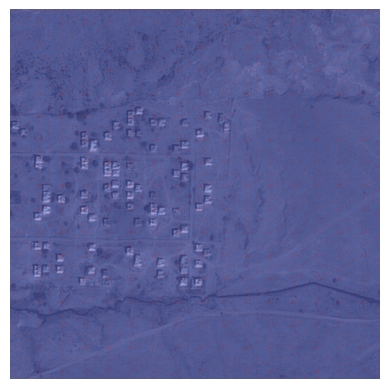

In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import Image as show_img
from keras_swin_unet import swin_train, swin_infer
import warnings
warnings.filterwarnings("ignore")
# from swin_transformer import cli  # CLI entry‑point functions

# ────────────────────────────────────────────────────────────────────────────
# Find the project root no matter where the notebook is launched
# (look for a directory that contains 'demo_data')
# ────────────────────────────────────────────────────────────────────────────
def find_project_root(start: Path, marker: str = "demo_data") -> Path:
    for parent in [start, *start.parents]:
        if (parent / marker).exists():
            return parent
    # fallback: use the starting directory itself
    return start

ROOT = find_project_root(Path.cwd())
DATA = ROOT / "demo_data"
IMAGES = DATA / "images"
MASKS  = DATA / "masks"

CHECKPOINT_DIR = ROOT / "checkpoint"
CHECKPOINT_DIR.mkdir(exist_ok=True)

print("Project root :", ROOT)
print("Dataset path :", DATA)
print("Dataset contains", len(list(IMAGES.glob('*.jpg'))), "images")



## 2 Train a tiny demo run (1 epochs)

In [2]:
from keras_swin_unet import swin_train

swin_train(
    data=DATA,
    model_dir='./checkpoint',
    num_classes=2,
    bs=1,
    epochs=1,
    patience=5,
    filter=16,
    depth=4,
    stack_down=2,
    stack_up=2,
    patch_size=[4, 4],
    num_heads=[4, 8, 8, 8],
    window_size=[4, 2, 2, 2],
    num_mlp=512,
    gamma=2.0,
    alpha=0.25,
    input_shape=[512, 512, 3],
    input_scale=255,
    mask_scale=255,
    visualize=2
)



I0000 00:00:1745247190.506916  701519 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9309 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:03:00.0, compute capability: 8.6
I0000 00:00:1745247225.323087  701701 service.cc:152] XLA service 0x7586e0002390 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745247225.323127  701701 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2025-04-21 22:53:46.510602: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745247231.204611  701701 cuda_dnn.cc:529] Loaded cuDNN version 90701
2025-04-21 22:53:56.552047: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_159'

 1/24 ━━━━━━━━━━━━━━━━━━━━ 25:56 68s/step - accuracy: 0.5010 - auc: 0.4873 - loss: 0.7690

I0000 00:00:1745247263.535262  701701 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5969 - auc: 0.6218 - loss: 0.5951 - val_accuracy: 0.8123 - val_auc: 0.8833 - val_loss: 0.3298
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


✅ Done. Metrics: {'Accuracy': 0.8241678873697916, 'F1': 0.8868237152814596, 'Precision': 0.9628683869868291, 'Recall': 0.8241678873697916, 'AUC': 0.500389692595042}


I0000 00:00:1745247825.819364  703504 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9298 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:03:00.0, compute capability: 8.6


⚠️ Resizing image from (1024, 1024) to model expected shape (512, 512)


I0000 00:00:1745247833.434346  703679 service.cc:152] XLA service 0x7d389c0028a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745247833.434387  703679 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2025-04-21 23:03:53.719590: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745247834.201332  703679 cuda_dnn.cc:529] Loaded cuDNN version 90701


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


I0000 00:00:1745247842.141773  703679 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


🖼 Saved overlay to output_overlay.png


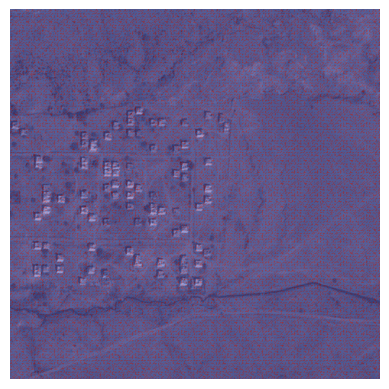

In [2]:
swin_infer(
    image="../demo_data/images/104.jpg",     # path to your input image
    output="output_overlay.png",          # where to save overlay visualization
    model_dir="./checkpoint",             # folder with best_model.keras
    num_classes=2,                        # binary or multiclass
    input_scale=255,                      # depends on image bit-depth
    gamma=2.0,
    alpha=0.25,
    visualize=1                           # 1: overlay only, >1: grid plot
)